In [1]:
import os
os.listdir()


['lab', 'migrated', 'Mobile_Sales.csv', 'nb.ibumb']

In [3]:
import pandas as pd

df = pd.read_csv("Mobile_Sales.csv")

print("Shape:", df.shape)
df.head()


Shape: (24983, 14)


,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,Processor Specification,RAM,ROM
0,Mobile Phone,Motorola,88EB4558,Site candidate activity company there bit insi...,78570,2023-08-02,2023-08-03,6,William Hess,South Kelsey,Central,Snapdragon 7 Gen,12GB,128GB
1,Mobile Phone,Samsung,9F975B08,Energy special low seven place audience.,159826,2025-03-19,2025-03-20,5,Leah Copeland,South Todd,Central,MediaTek Dimensity,8GB,256GB
2,Mobile Phone,Dell,14932CAE,Could before almost wind couple evening perfor...,11670,2023-10-10,2023-10-16,6,Nicole Gonzalez,South Miguel,North,Apple A-Series,16GB,256GB
3,Mobile Phone,Motorola,E3CF42BE,Responsibility form left final suffer party pi...,174698,2025-02-09,2025-03-20,10,Miranda Clayton,North Deanna,North,MediaTek Dimensity,6GB,64GB
4,Mobile Phone,Apple,F54013D6,To say system loss near him.,51251,2023-04-03,2023-04-19,9,Ms. Katie Anderson,Lake Laurenfort,North,Snapdragon 8 Gen,4GB,256GB


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10,5)
sns.set(style="whitegrid")


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24983 entries, 0 to 24982
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Product                  24983 non-null  object
 1   Brand                    24983 non-null  object
 2   Product Code             24983 non-null  object
 3   Product Specification    24983 non-null  object
 4   Price                    24983 non-null  int64 
 5   Inward Date              24983 non-null  object
 6   Dispatch Date            24983 non-null  object
 7   Quantity Sold            24983 non-null  int64 
 8   Customer Name            24983 non-null  object
 9   Customer Location        24983 non-null  object
 10  Region                   24983 non-null  object
 11  Processor Specification  24983 non-null  object
 12  RAM                      24983 non-null  object
 13  ROM                      24983 non-null  object
dtypes: int64(2), object(12)
memory usage: 

In [6]:
df.describe(include='all')


,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,Processor Specification,RAM,ROM
count,24983,24983,24983,24983,24983.000000,24983,24983,24983.000000,24983,24983,24983,24983,24983,24983
unique,1,20,24983,24983,NaN,731,787,NaN,21810,15565,5,7,6,5
top,Mobile Phone,Google,78566C17,Away also magazine receive such lay.,NaN,2024-10-26,2023-11-23,NaN,Michael Williams,South Michael,West,MediaTek Dimensity,4GB,256GB
freq,24983,1298,1,1,NaN,59,52,NaN,14,28,5099,3640,4247,5093
mean,NaN,NaN,NaN,NaN,102498.006364,NaN,NaN,5.510547,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,56478.485813,NaN,NaN,2.879988,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,5008.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,53151.500000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,102751.000000,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,151319.500000,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)
df.columns


Index(['product', 'brand', 'product_code', 'product_specification', 'price',
       'inward_date', 'dispatch_date', 'quantity_sold', 'customer_name',
       'customer_location', 'region', 'processor_specification', 'ram', 'rom'],
      dtype='object')

In [8]:
df.isnull().sum()


product                    0
brand                      0
product_code               0
product_specification      0
price                      0
inward_date                0
dispatch_date              0
quantity_sold              0
customer_name              0
customer_location          0
region                     0
processor_specification    0
ram                        0
rom                        0
dtype: int64

In [9]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


C:\Users\evolu\AppData\Local\Temp\ipykernel_23440\3342159593.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\evolu\AppData\Local\Temp\ipykernel_23440\3342159593.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [10]:
df['inward_date'] = pd.to_datetime(df['inward_date'])
df['dispatch_date'] = pd.to_datetime(df['dispatch_date'])


In [11]:
df['dispatch_days'] = (df['dispatch_date'] - df['inward_date']).dt.days
df['revenue'] = df['price'] * df['quantity_sold']


In [12]:
df.shape
df.head()


,product,brand,product_code,product_specification,price,inward_date,dispatch_date,quantity_sold,customer_name,customer_location,region,processor_specification,ram,rom,dispatch_days,revenue
0,Mobile Phone,Motorola,88EB4558,Site candidate activity company there bit insi...,78570,2023-08-02,2023-08-03,6,William Hess,South Kelsey,Central,Snapdragon 7 Gen,12GB,128GB,1,471420
1,Mobile Phone,Samsung,9F975B08,Energy special low seven place audience.,159826,2025-03-19,2025-03-20,5,Leah Copeland,South Todd,Central,MediaTek Dimensity,8GB,256GB,1,799130
2,Mobile Phone,Dell,14932CAE,Could before almost wind couple evening perfor...,11670,2023-10-10,2023-10-16,6,Nicole Gonzalez,South Miguel,North,Apple A-Series,16GB,256GB,6,70020
3,Mobile Phone,Motorola,E3CF42BE,Responsibility form left final suffer party pi...,174698,2025-02-09,2025-03-20,10,Miranda Clayton,North Deanna,North,MediaTek Dimensity,6GB,64GB,39,1746980
4,Mobile Phone,Apple,F54013D6,To say system loss near him.,51251,2023-04-03,2023-04-19,9,Ms. Katie Anderson,Lake Laurenfort,North,Snapdragon 8 Gen,4GB,256GB,16,461259


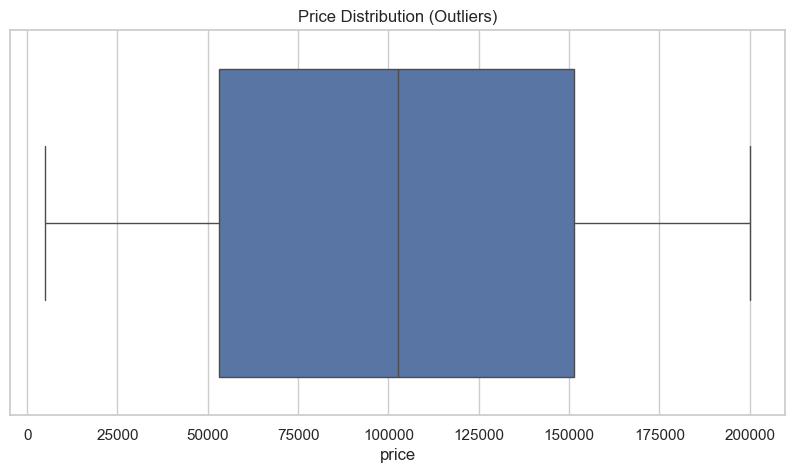

In [13]:


sns.boxplot(x=df['price'])
plt.title("Price Distribution (Outliers)")
plt.show()


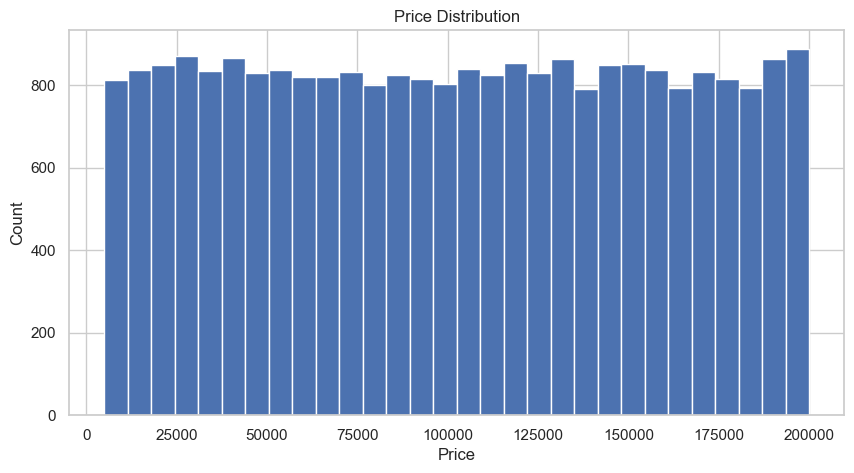

In [14]:
plt.hist(df['price'], bins=30)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Price Distribution")
plt.show()


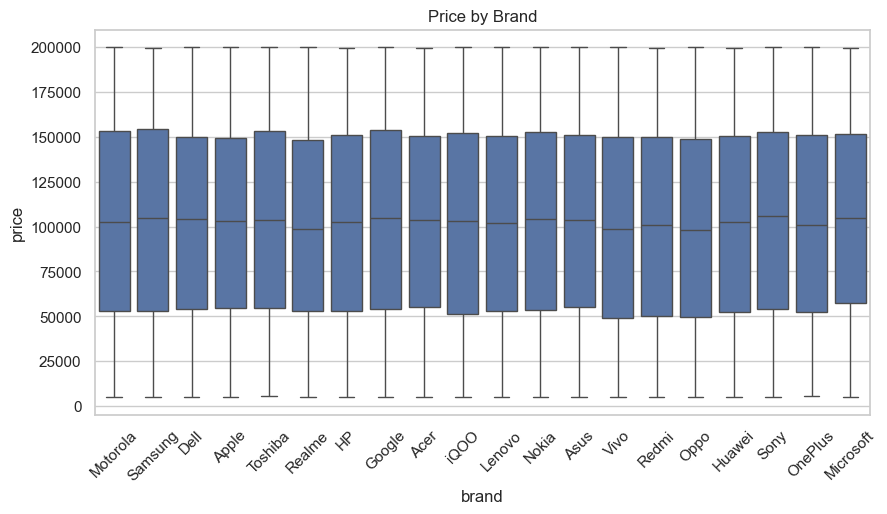

In [15]:
sns.boxplot(x='brand', y='price', data=df)
plt.xticks(rotation=45)
plt.title("Price by Brand")
plt.show()


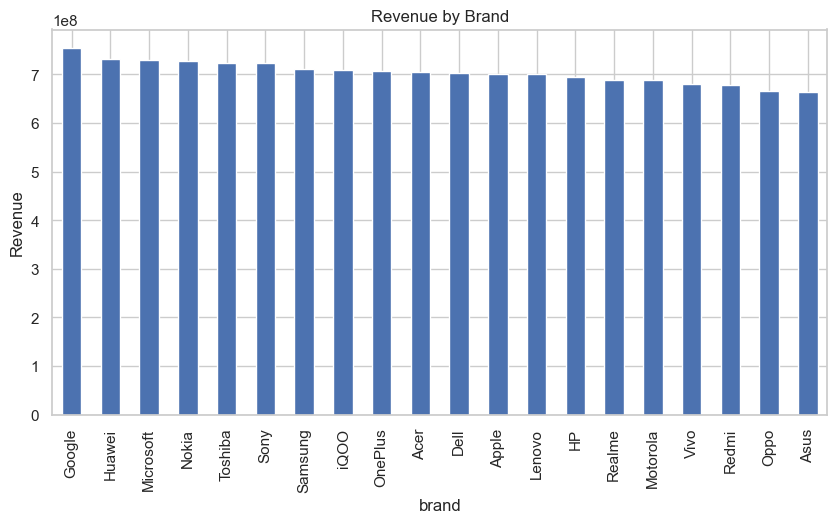

In [16]:
df.groupby('brand')['revenue'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Revenue by Brand")
plt.ylabel("Revenue")
plt.show()


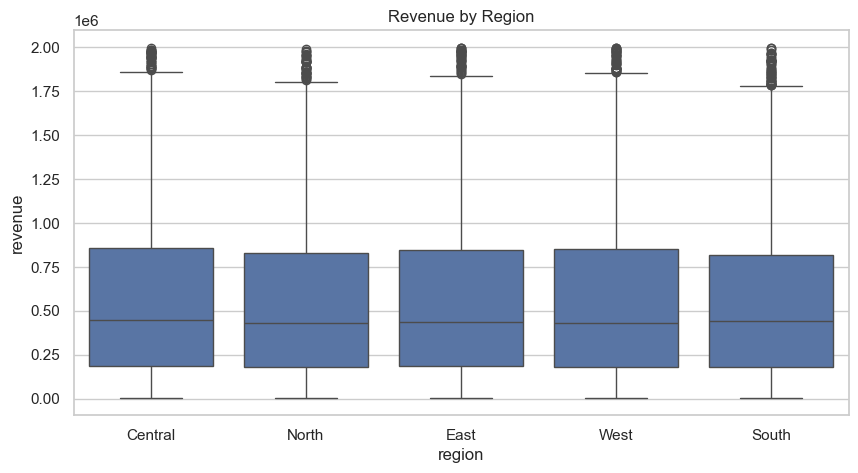

In [17]:
sns.boxplot(x='region', y='revenue', data=df)
plt.title("Revenue by Region")
plt.show()


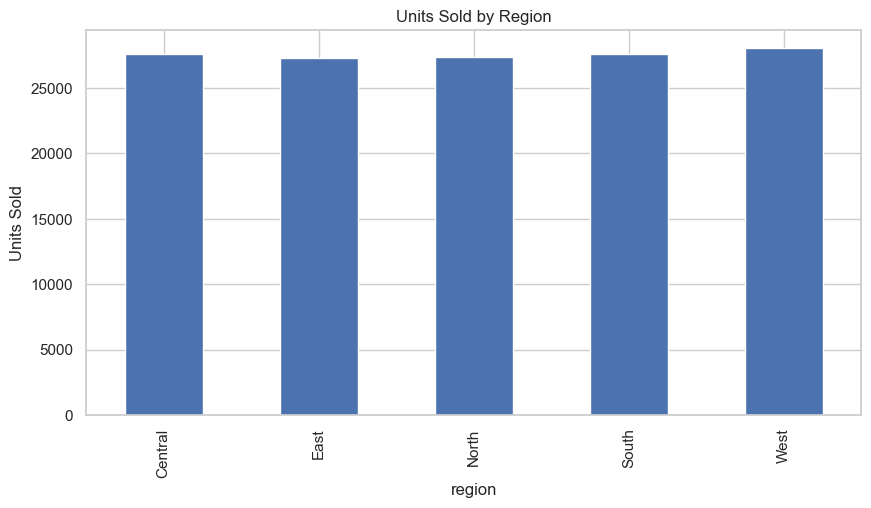

In [18]:
df.groupby('region')['quantity_sold'].sum().plot(kind='bar')
plt.title("Units Sold by Region")
plt.ylabel("Units Sold")
plt.show()


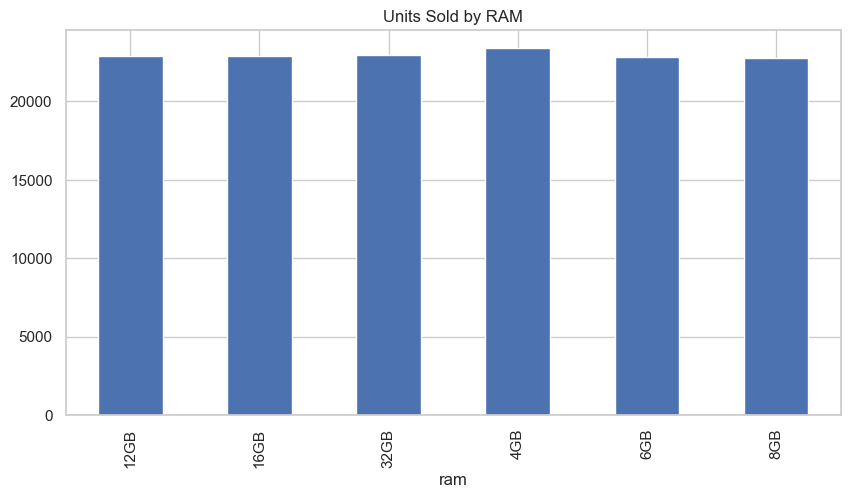

In [19]:
df.groupby('ram')['quantity_sold'].sum().plot(kind='bar')
plt.title("Units Sold by RAM")
plt.show()


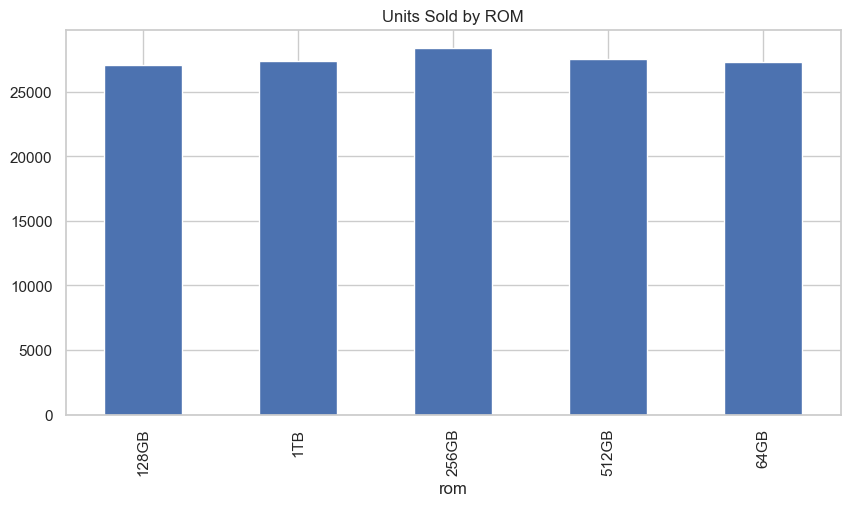

In [20]:
df.groupby('rom')['quantity_sold'].sum().plot(kind='bar')
plt.title("Units Sold by ROM")
plt.show()


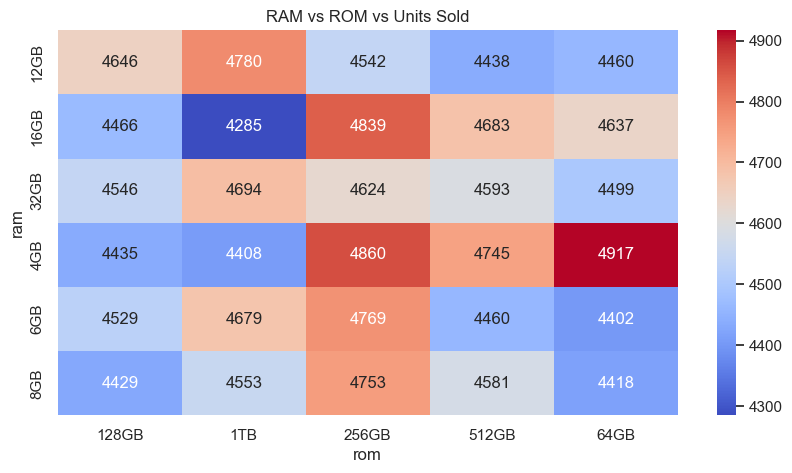

In [21]:
pivot = df.pivot_table(
    values='quantity_sold',
    index='ram',
    columns='rom',
    aggfunc='sum'
)

sns.heatmap(pivot, annot=True, fmt=".0f", cmap="coolwarm")
plt.title("RAM vs ROM vs Units Sold")
plt.show()


In [23]:
df.columns


Index(['product', 'brand', 'product_code', 'product_specification', 'price',
       'inward_date', 'dispatch_date', 'quantity_sold', 'customer_name',
       'customer_location', 'region', 'processor_specification', 'ram', 'rom',
       'dispatch_days', 'revenue'],
      dtype='object')

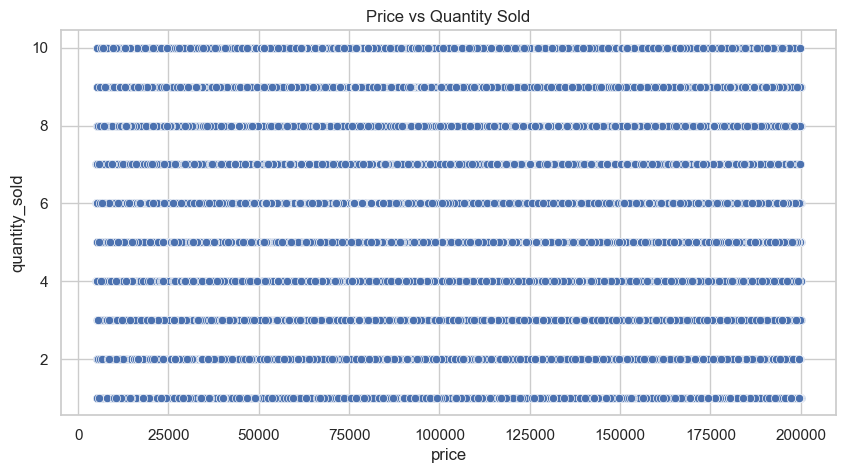

In [28]:
sns.scatterplot(x='price', y='quantity_sold', data=df)
plt.title("Price vs Quantity Sold")
plt.show()


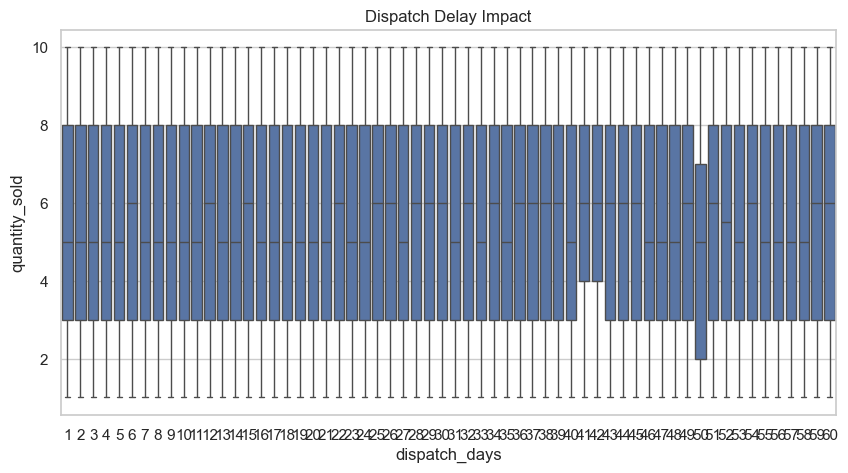

In [29]:
sns.boxplot(x='dispatch_days', y='quantity_sold', data=df)
plt.title("Dispatch Delay Impact")
plt.show()


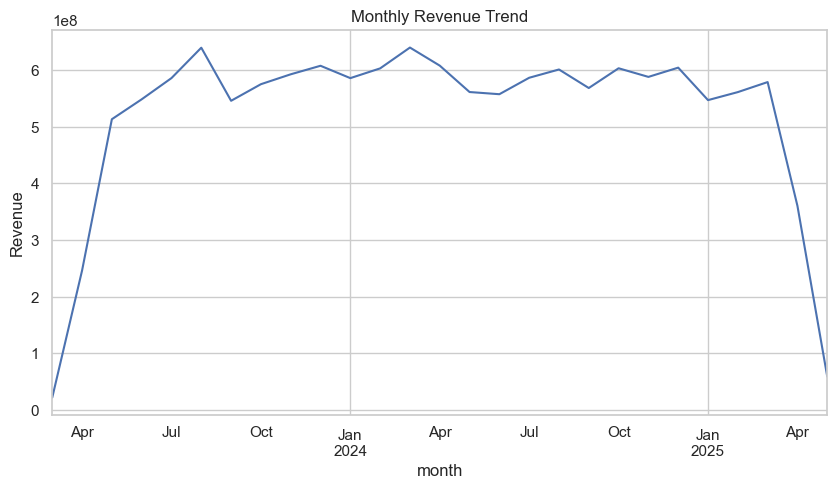

In [30]:
df['month'] = df['dispatch_date'].dt.to_period('M')

df.groupby('month')['revenue'].sum().plot()
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.show()


In [31]:
print("Final Rows Used:", df.shape[0])


Final Rows Used: 24983
